In [116]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from seaborn_qqplot import pplot

# Loading Script

In [96]:
with open("output/base_simulation_results/base_result_regression_based.json","r") as f:
    output_dict=json.load(f)

In [97]:
output_df=pd.DataFrame(output_dict).transpose()
output_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442471 entries, 1 to 442471
Data columns (total 77 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   random_patient                      442471 non-null  object
 1   VN_IN                               442471 non-null  object
 2   datetime_opd_queuing                442471 non-null  object
 3   length_inqueue_opd                  442471 non-null  object
 4   datetime_opd                        442471 non-null  object
 5   datetime_opd_finished               442471 non-null  object
 6   VN_OUT                              429405 non-null  object
 7   actual_process_time                 112013 non-null  object
 8   simulate_process_time               112013 non-null  object
 9   datetime_laboratory_queuing         44346 non-null   object
 10  length_inqueue_laboratory           44346 non-null   object
 11  datetime_laboratory                 44346 no

In [98]:
for col_df in output_df.columns[output_df.columns.str.contains('datetime')]:
    output_df[col_df]=pd.to_datetime(output_df[col_df],yearfirst=True,format="%Y-%m-%d %H:%M:%S")
for col_df in output_df.columns[output_df.columns.str.contains('VN')]:
    output_df[col_df]=pd.to_datetime(output_df[col_df],yearfirst=True,format="%Y-%m-%d %H:%M:%S")

In [99]:
for col_df in output_df.columns[output_df.columns.str.contains('length')]:
    output_df[col_df]=output_df[col_df].astype(float)
for col_df in output_df.columns[output_df.columns.str.contains('inuse')]:
    output_df[col_df]=output_df[col_df].astype(float)

In [100]:
output_df['random_patient']=output_df['random_patient'].map({'False':False,'True':True})

In [101]:
output_df['simulate_process_time']=pd.to_timedelta(output_df['simulate_process_time']).dt.total_seconds()/60

In [102]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442471 entries, 1 to 442471
Data columns (total 77 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   random_patient                      442471 non-null  bool          
 1   VN_IN                               442471 non-null  datetime64[ns]
 2   datetime_opd_queuing                442471 non-null  datetime64[ns]
 3   length_inqueue_opd                  442471 non-null  float64       
 4   datetime_opd                        442471 non-null  datetime64[ns]
 5   datetime_opd_finished               442471 non-null  datetime64[ns]
 6   VN_OUT                              429405 non-null  datetime64[ns]
 7   actual_process_time                 112013 non-null  object        
 8   simulate_process_time               112013 non-null  float64       
 9   datetime_laboratory_queuing         44346 non-null   datetime64[ns]
 10  length_inqueu

In [103]:
output_df

,random_patient,VN_IN,datetime_opd_queuing,length_inqueue_opd,datetime_opd,datetime_opd_finished,VN_OUT,actual_process_time,simulate_process_time,datetime_laboratory_queuing,...,datetime_nephrology,datetime_nephrology_finished,datetime_gi_liver_queuing,length_inqueue_gi_liver,datetime_gi_liver,datetime_gi_liver_finished,datetime_neurology_queuing,length_inqueue_neurology,datetime_neurology,datetime_neurology_finished
1,True,2022-01-01 05:00:00,2022-01-01 05:00:00,0.0,2022-01-01 07:00:00,2022-01-01 07:07:29,2022-01-01 07:07:29,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
2,True,2022-01-01 05:18:20,2022-01-01 05:18:20,0.0,2022-01-01 07:00:20,2022-01-01 07:00:53,2022-01-01 07:00:53,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
3,True,2022-01-01 05:21:31,2022-01-01 05:21:31,0.0,2022-01-01 07:00:31,2022-01-01 07:08:24,2022-01-01 07:08:24,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
4,True,2022-01-01 05:29:28,2022-01-01 05:29:28,0.0,2022-01-01 07:00:28,2022-01-01 07:21:09,2022-01-01 07:21:09,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
5,True,2022-01-01 05:39:08,2022-01-01 05:39:08,0.0,2022-01-01 07:00:08,2022-01-01 07:07:24,2022-01-01 07:07:24,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442467,True,2022-12-31 15:21:28,2022-12-31 15:21:28,0.0,2022-12-31 15:21:28,2022-12-31 15:27:27,2022-12-31 15:27:27,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
442468,False,2022-12-31 15:25:49,2022-12-31 15:25:49,0.0,2022-12-31 15:25:49,2022-12-31 15:26:49,NaT,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
442469,False,2022-12-31 15:29:41,2022-12-31 15:29:41,0.0,2022-12-31 15:29:41,2022-12-31 15:30:23,NaT,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
442470,False,2022-12-31 15:37:51,2022-12-31 15:37:51,0.0,2022-12-31 15:37:51,2022-12-31 15:41:49,2022-12-31 16:06:37,371.35,28.766667,2022-12-31 15:41:49,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT


# QQ-like plot of actual vs simulate

In [104]:
selected_df=output_df[~output_df['random_patient']]
selected_df

,random_patient,VN_IN,datetime_opd_queuing,length_inqueue_opd,datetime_opd,datetime_opd_finished,VN_OUT,actual_process_time,simulate_process_time,datetime_laboratory_queuing,...,datetime_nephrology,datetime_nephrology_finished,datetime_gi_liver_queuing,length_inqueue_gi_liver,datetime_gi_liver,datetime_gi_liver_finished,datetime_neurology_queuing,length_inqueue_neurology,datetime_neurology,datetime_neurology_finished
7,False,2022-01-01 06:26:03,2022-01-01 06:26:03,0.0,2022-01-01 07:00:03,2022-01-01 07:00:15,2022-01-01 07:00:15,165.366667,34.200000,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
8,False,2022-01-01 06:26:28,2022-01-01 06:26:28,0.0,2022-01-01 07:00:28,2022-01-01 07:15:38,2022-01-01 07:45:20,174.173617,78.866667,2022-01-01 07:15:38,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
12,False,2022-01-01 06:34:01,2022-01-01 06:34:01,0.0,2022-01-01 07:00:01,2022-01-01 07:56:36,2022-01-01 09:26:51,201.85805,172.833333,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
15,False,2022-01-01 06:40:49,2022-01-01 06:40:49,0.0,2022-01-01 07:00:49,2022-01-01 07:06:01,2022-01-01 07:48:58,144.454167,68.150000,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
17,False,2022-01-01 06:42:38,2022-01-01 06:42:38,0.0,2022-01-01 07:00:38,2022-01-01 07:12:24,2022-01-01 12:19:31,95.0,336.883333,2022-01-01 07:12:24,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442464,False,2022-12-31 15:07:12,2022-12-31 15:07:12,0.0,2022-12-31 15:07:12,2022-12-31 15:18:23,NaT,NaN,NaN,2022-12-31 15:18:23,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
442465,False,2022-12-31 15:07:55,2022-12-31 15:07:55,0.0,2022-12-31 15:07:55,2022-12-31 15:27:22,NaT,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
442468,False,2022-12-31 15:25:49,2022-12-31 15:25:49,0.0,2022-12-31 15:25:49,2022-12-31 15:26:49,NaT,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT
442469,False,2022-12-31 15:29:41,2022-12-31 15:29:41,0.0,2022-12-31 15:29:41,2022-12-31 15:30:23,NaT,NaN,NaN,NaT,...,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaN,NaT,NaT


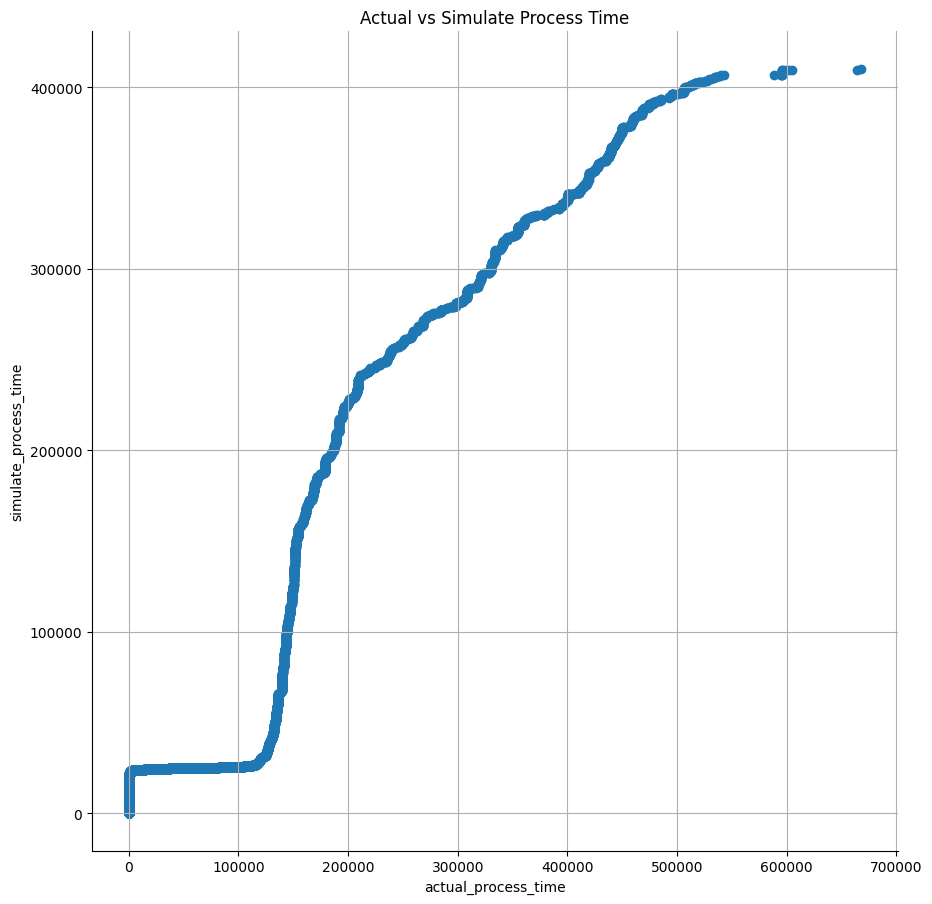

In [118]:
pplot(data=selected_df.dropna(subset=['simulate_process_time']),x='actual_process_time',y='simulate_process_time',kind='qq',height=9)
plt.title("Actual vs Simulate Process Time")
plt.grid()
plt.show()